In [1]:
%pip install ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from https://files.pythonhosted.org/packages/74/5e/2475ac62faf2e342b2bf20b8d8e375f49400ecb38f52e4e0a7557eb1cedb/jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.3 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import utils

%matplotlib widget


DatePicker(value=None, description='Pick your bday', step=1, style=DescriptionStyle(description_width='initial…

Button(description='Simulate!', style=ButtonStyle())

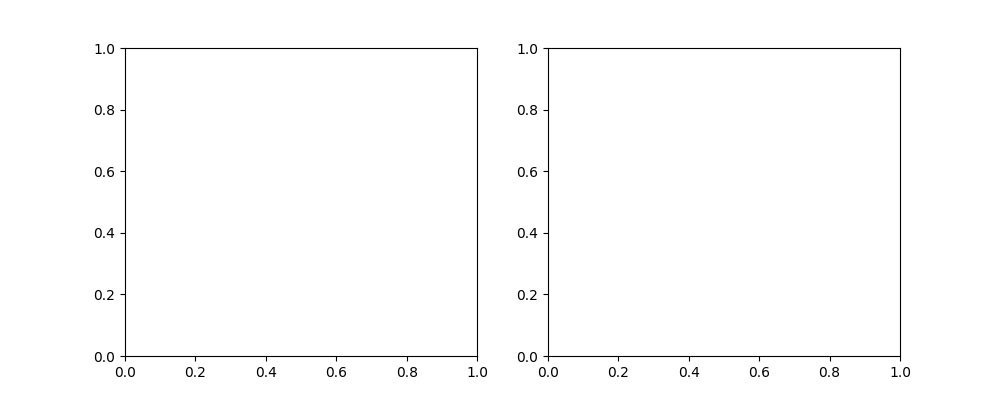

In [9]:
game = utils.your_bday()

In [12]:
def simulate(problem_func, n_students=365,n_simulations=1000):
    match = 0 
    for _ in range(n_simulations):
        if problem_func(n_students):
            match+=1 

    return match/n_simulations
#The higher the n umber of stuydens the higher the probability of natch 
#The huigher the number of simulations the higher the accuracy of the simulated probablity 

In [13]:
def problem_1(n_students):
    predef_bday = np.random.randint(0,365)

    gen_bday = np.random.randint(1,365,(n_students))

    return predef_bday in gen_bday 

In [14]:
n = 100 
simulated_prob = simulate(problem_1,n_students=n, n_simulations=10000)

print(simulated_prob)

0.2462


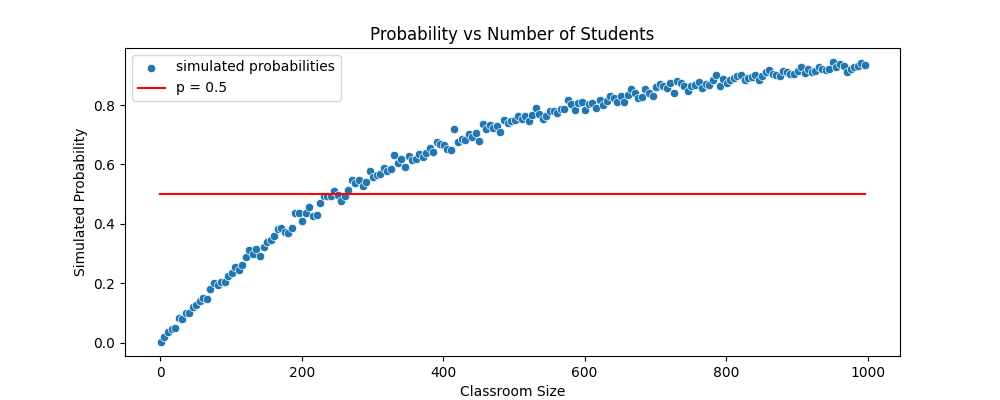

In [15]:
# Generate the simulated probability for every classroom
simulated_probs_1 = [simulate(problem_1, n_students=n) for n in utils.big_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_1, utils.big_classroom_sizes)

In [16]:
def problem_2(n_students):
    gen_bdays = np.random.randint(1,365,(n_students))

    rnd_index = np.random.randint(0,len(gen_bdays))

    rnd_bday = gen_bdays[rnd_index]

    remaining_bday = np.delete(gen_bdays,rnd_index,axis=0)

    return rnd_bday in remaining_bday

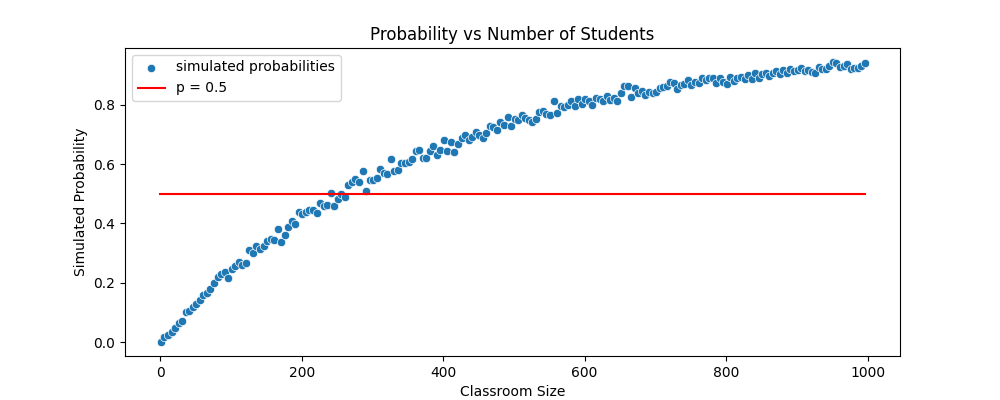

In [17]:
# Generate the simulated probability for every classroom
simulated_probs_2 = [simulate(problem_2, n_students=n) for n in utils.big_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_2, utils.big_classroom_sizes)

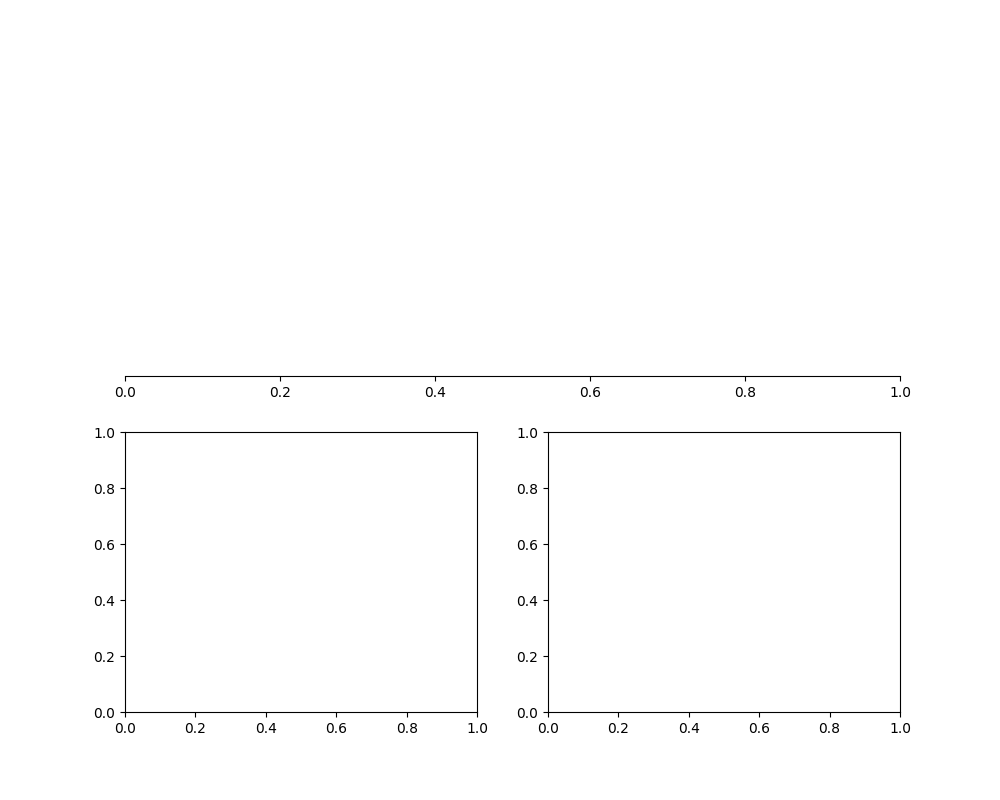

In [18]:
game_third_prob = utils.third_bday_problem()

In [20]:
def problem_3(n_students):
    gen_bdays = np.random.randint(0,365,(n_students))
    unique_bdays=np.array(list(set(gen_bdays)))
    return len(unique_bdays) != len(gen_bdays)


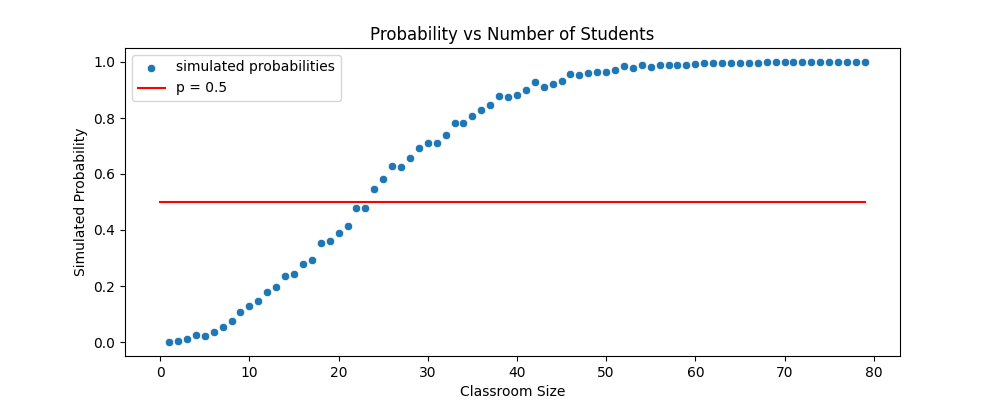

In [21]:
# Generate the simulated probability for every classroom
simulated_probs_3 = [simulate(problem_3, n_students=n) for n in utils.small_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_3, utils.small_classroom_sizes)

In [23]:
def problem_4(n_students):
    gen_bdays_1 = np.random.randint(0,365,(n_students))
    gen_bdays_2 = np.random.randint(0,365,(n_students))

    return np.isin(gen_bdays_1,gen_bdays_2).any()


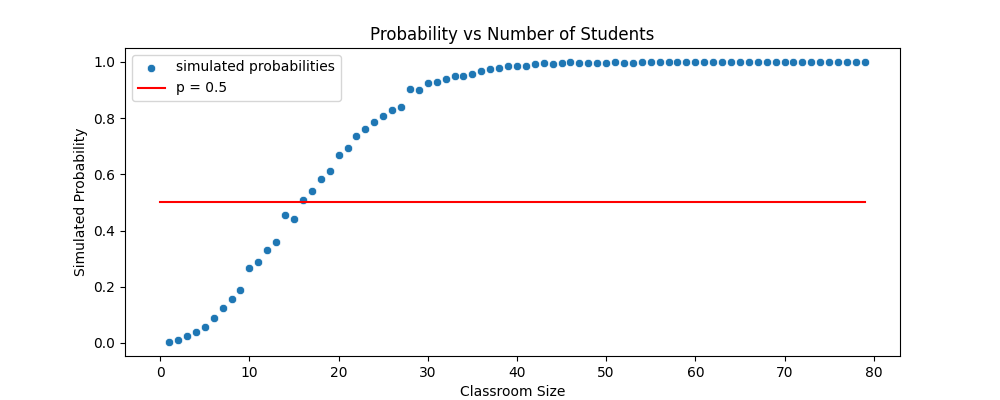

In [24]:
# Generate the simulated probability for every classroom
simulated_probs_4 = [simulate(problem_4, n_students=n) for n in utils.small_classroom_sizes]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_4, utils.small_classroom_sizes)